## Welcome to my AmericanPut Solver ! 
To use it, just set your input parameters and run all cells ! The price will be output

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("..")

from src.grid import TimeSpaceGrid
from src.payoffs import put_payoff_log
from src.operators import bs_log_operator_tridiag
from src.american_pde import solve_american_put_bs_log_theta

from math import sqrt, exp, log
from scipy.stats import norm

# Input parameters

In [10]:
S0    = 100.0
K     = 100.0
r     = 0.05
sigma = 0.2
T     = 1.0

S_min = 0.01 * K
S_max = 4.0  * K
L     = np.log(S_max)

N = 200
M = 500
theta = 1.0   

grid = TimeSpaceGrid(T=T, L=L, N=N, M=M)
print(f"k = {grid.k:.4e}, h = {grid.h:.4e}")

k = 2.0000e-03, h = 5.9617e-02


In [11]:
payoff_T = put_payoff_log(grid.x, K)
a, b, c = bs_log_operator_tridiag(grid, r=r, sigma=sigma)

v = solve_american_put_bs_log_theta(
    grid=grid,
    a=a,
    b=b,
    c=c,
    payoff_T=payoff_T,
    theta=theta,
)

# Output

American put PDE price ≈ 6.0957192802063265


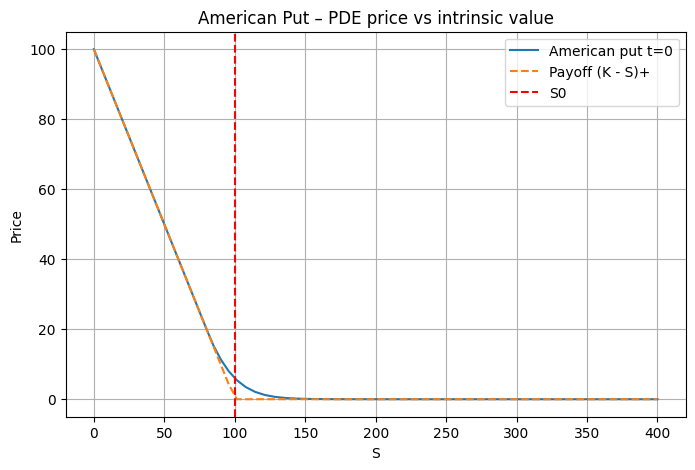

In [12]:
x0 = np.log(S0)
S_grid = np.exp(grid.x)

price_am = np.interp(x0, grid.x, v[0, :])
print("American put PDE price ≈", price_am)

plt.figure(figsize=(8, 5))
plt.plot(S_grid, v[0, :], label="American put t=0")
plt.plot(S_grid, payoff_T, "--", label="Payoff (K - S)+")
plt.axvline(S0, color="r", linestyle="--", label="S0")
plt.xlabel("S")
plt.ylabel("Price")
plt.title("American Put – PDE price vs intrinsic value")
plt.grid(True)
plt.legend()
plt.show()
